In [100]:
import scipy.io
from scipy.io import arff
from io import StringIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
import seaborn as sns


In [90]:

data = pd.read_csv("../Datasets/9.ThoraticSurgeryData/ThoraricSurgery.arff",delimiter = ',',names=["DGN", "PRE4", "PRE5", "PRE6","PRE7","PRE8","PRE9","PRE10","PRE11","PRE14","PRE17","PRE19","PRE25","PRE30","PRE32","AGE","Risk1Y"])

data.head()

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Y
0,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


Preprocessing


In [91]:
X = pd.DataFrame(df,columns=["DGN", "PRE4", "PRE5", "PRE6","PRE7","PRE8","PRE9","PRE10","PRE11","PRE14","PRE17","PRE19","PRE25","PRE30","PRE32","AGE"])
cat = ["DGN","PRE6","PRE7","PRE8","PRE9","PRE10","PRE11","PRE14","PRE17","PRE19","PRE25","PRE30","PRE32"]

for i in cat:
    X[i] = pd.Categorical(X[i]).codes
    
y = data.iloc[:,16:17]
y['Risk1Y'] = pd.Categorical(y['Risk1Y']).codes
X

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE
0,1,2.88,2.16,1,0,0,0,1,1,3,0,0,0,1,0,60.0
1,2,3.40,1.88,0,0,0,0,0,0,1,0,0,0,1,0,51.0
2,2,2.76,2.08,1,0,0,0,1,0,0,0,0,0,1,0,59.0
3,2,3.68,3.04,0,0,0,0,0,0,0,0,0,0,0,0,54.0
4,2,2.44,0.96,2,0,1,0,1,1,0,0,0,0,1,0,73.0
5,2,2.48,1.88,1,0,0,0,1,0,0,0,0,0,0,0,51.0
6,2,4.36,3.28,1,0,0,0,1,0,1,1,0,0,1,0,59.0
7,1,3.19,2.50,1,0,0,0,1,0,0,0,0,1,1,0,66.0
8,2,3.16,2.64,2,0,0,0,1,1,0,0,0,0,1,0,68.0
9,2,2.32,2.16,1,0,0,0,1,0,0,0,0,0,1,0,54.0


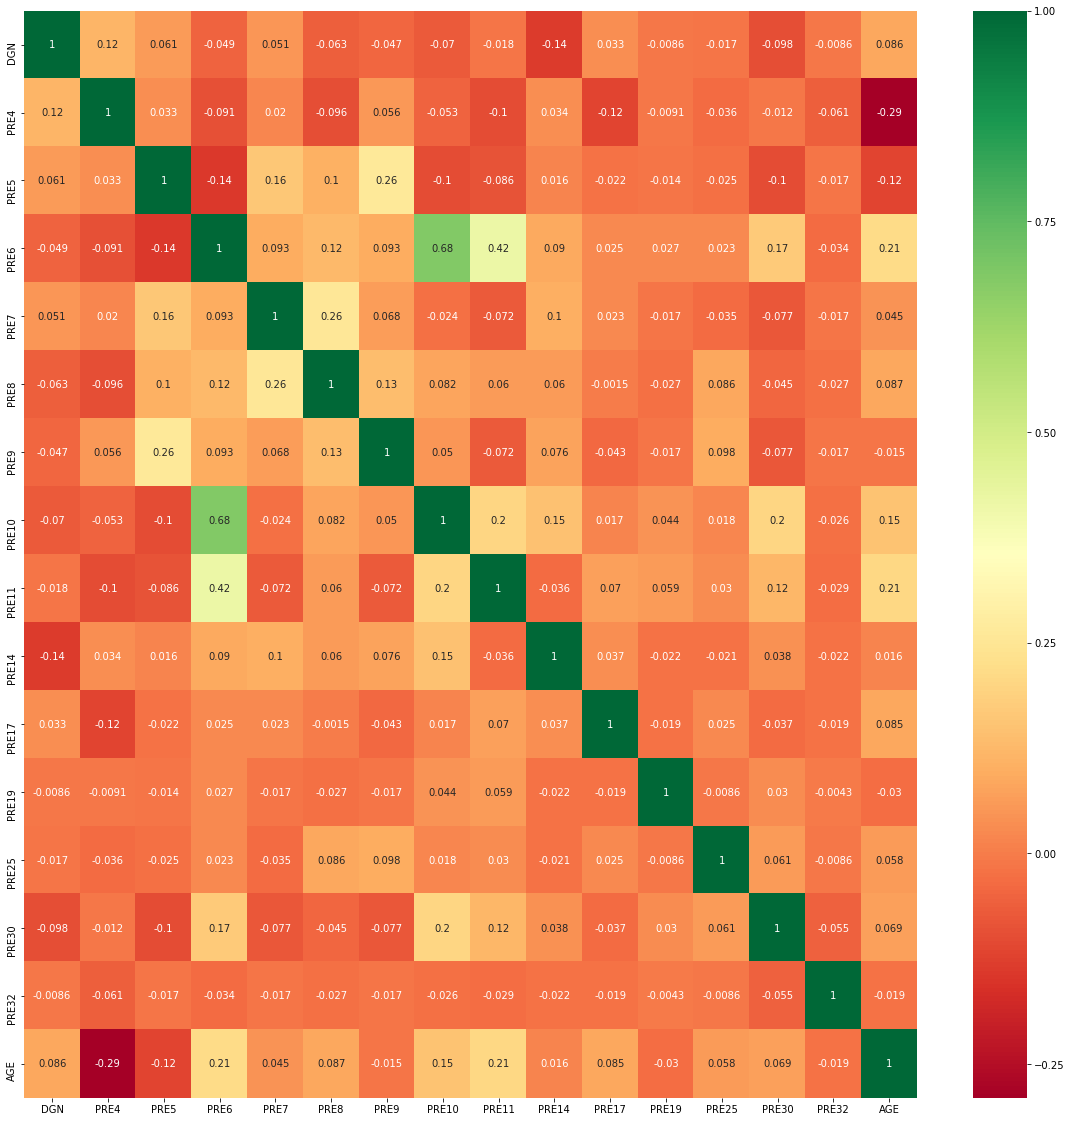

In [107]:
#Splitting the data
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.25, random_state=42)

corrmat = X.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(X.corr(),annot=True,cmap="RdYlGn")
# scalar = sklearn.preprocessing.StandardScaler()
# scalar.fit_transform(X_train)

In [127]:
for i in range(10,100,30):
  knn = KNeighborsClassifier(n_neighbors=i,weights='distance')
  knn.fit(X_train, y_train.values.ravel())
  print("Training Accuracy :" + str(knn.score(X_train, y_train)))
  print("Testing Accuracy :" + str(knn.score(X_test, y_test)))
xx  = np.array([2,2.56,2.32,0,0,1,0,1,0,1,0,0,0,0,0,0]).reshape(-1,1).T
print(xx.shape,X_train.shape)
print(knn.predict(xx))
 

Training Accuracy :1.0
Testing Accuracy :0.8050847457627118
Training Accuracy :1.0
Testing Accuracy :0.8050847457627118
Training Accuracy :1.0
Testing Accuracy :0.8050847457627118
(1, 16) (352, 16)
[0]


In [128]:
#SVM
C_grid = np.logspace(0, 3, 4)
gamma_grid = np.logspace(-2, 1, 4)
for i in range(4):
    for j in range(4):
        C = C_grid[i]
        gamma = gamma_grid[j]
        svm = SVC(C=C, gamma=gamma, kernel='rbf')
        svm.fit(X_train, y_train.values.ravel())
        accuracy = svm.score(X_test, y_test.values.ravel())
        print("%.1f%% test accuracy for C=%.1f gamma=%.2f" % (accuracy*100, C, gamma))

80.5% test accuracy for C=1.0 gamma=0.01
80.5% test accuracy for C=1.0 gamma=0.10
80.5% test accuracy for C=1.0 gamma=1.00
80.5% test accuracy for C=1.0 gamma=10.00
80.5% test accuracy for C=10.0 gamma=0.01
79.7% test accuracy for C=10.0 gamma=0.10
79.7% test accuracy for C=10.0 gamma=1.00
79.7% test accuracy for C=10.0 gamma=10.00
78.8% test accuracy for C=100.0 gamma=0.01
78.0% test accuracy for C=100.0 gamma=0.10
78.8% test accuracy for C=100.0 gamma=1.00
79.7% test accuracy for C=100.0 gamma=10.00
78.0% test accuracy for C=1000.0 gamma=0.01
78.0% test accuracy for C=1000.0 gamma=0.10
78.8% test accuracy for C=1000.0 gamma=1.00
79.7% test accuracy for C=1000.0 gamma=10.00


In [129]:
#Logistic Regression
co_reg= np.logspace(-4, 4, 20)
penalty_reg = ['l1','l2']
for pen in penalty_reg:
  for i in co_reg:
    clf = LogisticRegression(random_state=0, solver='liblinear', penalty=pen , C=i).fit(X_train, y_train.values.ravel())
    print(clf.score(X_test, y_test.values.ravel()))

0.8050847457627118
0.8050847457627118
0.8050847457627118
0.8050847457627118
0.8050847457627118
0.8050847457627118
0.8050847457627118
0.8050847457627118
0.8050847457627118
0.8050847457627118
0.8050847457627118
0.7966101694915254
0.7966101694915254
0.7966101694915254
0.7966101694915254
0.7966101694915254
0.7966101694915254
0.7966101694915254
0.7966101694915254
0.7966101694915254
0.8050847457627118
0.8050847457627118
0.8050847457627118
0.8050847457627118
0.8050847457627118
0.8050847457627118
0.8050847457627118
0.8050847457627118
0.8050847457627118
0.8050847457627118
0.8050847457627118
0.8050847457627118
0.7966101694915254
0.7966101694915254
0.7966101694915254
0.7966101694915254
0.7966101694915254
0.7966101694915254
0.7966101694915254
0.7966101694915254


In [130]:
#Decision Tree
depth_list = np.linspace(1, 10, 10, endpoint=True)
minSplits_list = np.linspace(0.1, 1.0, 10, endpoint=True)
max_features = list(range(1,X_train.shape[1]))

In [131]:
list_train_results = []
list_test_results = []

for maxdepth in depth_list:
 # for minsamples in minSplits_list:
#for maxfet in max_features
    clf = DecisionTreeClassifier(random_state=0,max_depth=maxdepth)
    clf.fit(X_train,y_train.values.ravel())
    train_pred = clf.predict(X_train)
    #false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    #roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    #list_train_results.append(roc_auc)
    #print("Training Auc : " + str(roc_auc))
    #y_pred = clf.predict(x_test)
    #false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    #roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    #list_test_results.append(roc_auc)
    #print("Test Auc : " + str(roc_auc))
    print("Training Accuracy :"  +str(clf.score(X_train,y_train.values.ravel())))
    print("Test Accuracy : " + str(clf.score(X_test,y_test.values.ravel())))


Training Accuracy :0.8693181818181818
Test Accuracy : 0.7966101694915254
Training Accuracy :0.8778409090909091
Test Accuracy : 0.788135593220339
Training Accuracy :0.8835227272727273
Test Accuracy : 0.788135593220339
Training Accuracy :0.8835227272727273
Test Accuracy : 0.788135593220339
Training Accuracy :0.8920454545454546
Test Accuracy : 0.7796610169491526
Training Accuracy :0.9090909090909091
Test Accuracy : 0.7966101694915254
Training Accuracy :0.9289772727272727
Test Accuracy : 0.7796610169491526
Training Accuracy :0.9460227272727273
Test Accuracy : 0.7966101694915254
Training Accuracy :0.96875
Test Accuracy : 0.788135593220339
Training Accuracy :0.9772727272727273
Test Accuracy : 0.7966101694915254


In [132]:
#Random Forest


n_estimators = np.linspace(10,100,10)
max_depth = np.linspace(1,6,2)
for est in n_estimators:
  for dep in max_depth:
    clf = RandomForestClassifier(n_estimators=int(est), max_depth=dep,random_state=0).fit(X_train,y_train.values.ravel())
    y_pred = clf.predict(X_test)
    print("Training Accuracy : "+ str(clf.score(X_train, y_train)))
    print("Test Accuracy : " + str(accuracy_score(y_test, y_pred)))



Training Accuracy : 0.8664772727272727
Test Accuracy : 0.8050847457627118
Training Accuracy : 0.9005681818181818
Test Accuracy : 0.8050847457627118
Training Accuracy : 0.8664772727272727
Test Accuracy : 0.8050847457627118
Training Accuracy : 0.9034090909090909
Test Accuracy : 0.8050847457627118
Training Accuracy : 0.8664772727272727
Test Accuracy : 0.8050847457627118
Training Accuracy : 0.9005681818181818
Test Accuracy : 0.8050847457627118
Training Accuracy : 0.8664772727272727
Test Accuracy : 0.8050847457627118
Training Accuracy : 0.90625
Test Accuracy : 0.8050847457627118
Training Accuracy : 0.8664772727272727
Test Accuracy : 0.8050847457627118
Training Accuracy : 0.90625
Test Accuracy : 0.8050847457627118
Training Accuracy : 0.8664772727272727
Test Accuracy : 0.8050847457627118
Training Accuracy : 0.90625
Test Accuracy : 0.8050847457627118
Training Accuracy : 0.8664772727272727
Test Accuracy : 0.8050847457627118
Training Accuracy : 0.9034090909090909
Test Accuracy : 0.80508474576271

In [134]:
# [0]:

#Gaussian Naive Bayes Classification Model


clf = GaussianNB()
clf.fit(X_train,y_train.values.ravel())
y_pred = clf.predict(X_test)
print("Training Accuracy : "+ str(clf.score(X_train, y_train)))
print("Test Accuracy : " + str(accuracy_score(y_test, y_pred)))




Training Accuracy : 0.21306818181818182
Test Accuracy : 0.22033898305084745


In [135]:
#AdaBoost Classification Model
estimator = np.linspace(10,100,10)
for est in estimator:
  clf = AdaBoostClassifier(n_estimators=int(est), random_state=0,learning_rate=1)
  clf.fit(X_train, y_train.values.ravel())
  print("Training Accuracy : "+ str(clf.score(X_train, y_train)))
  print("Test Accuracy : " + str(clf.score(X_test,y_test)))

Training Accuracy : 0.8721590909090909
Test Accuracy : 0.7966101694915254
Training Accuracy : 0.875
Test Accuracy : 0.7966101694915254
Training Accuracy : 0.875
Test Accuracy : 0.788135593220339
Training Accuracy : 0.8835227272727273
Test Accuracy : 0.788135593220339
Training Accuracy : 0.8806818181818182
Test Accuracy : 0.7711864406779662
Training Accuracy : 0.8892045454545454
Test Accuracy : 0.788135593220339
Training Accuracy : 0.8835227272727273
Test Accuracy : 0.7711864406779662
Training Accuracy : 0.9005681818181818
Test Accuracy : 0.7711864406779662
Training Accuracy : 0.8920454545454546
Test Accuracy : 0.7796610169491526
Training Accuracy : 0.8920454545454546
Test Accuracy : 0.7796610169491526


In [136]:
#Neural Networks Clasisifer Model
hiddenLayers = (20,40,60,80,100,120)
learningrate = ['constant', 'invscaling', 'adaptive']
maxIteration = np.linspace(20,200,10)
print(learningrate)
print(maxIteration)
for lr in learningrate:
  for maxIte in maxIteration:
    clf = MLPClassifier(hidden_layer_sizes=hiddenLayers,max_iter=int(maxIte),learning_rate=lr).fit(X_train,y_train.values.ravel()) 
    print("Training Accuracy : "+ str(clf.score(X_train, y_train)))
    print("Test Accuracy : " + str(clf.score(X_test,y_test)))


['constant', 'invscaling', 'adaptive']
[ 20.  40.  60.  80. 100. 120. 140. 160. 180. 200.]
Training Accuracy : 0.8664772727272727
Test Accuracy : 0.8050847457627118


/Users/gursimransingh/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/gursimransingh/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training Accuracy : 0.8664772727272727
Test Accuracy : 0.8050847457627118


/Users/gursimransingh/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training Accuracy : 0.8664772727272727
Test Accuracy : 0.8050847457627118


/Users/gursimransingh/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training Accuracy : 0.8664772727272727
Test Accuracy : 0.8050847457627118


/Users/gursimransingh/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training Accuracy : 0.8721590909090909
Test Accuracy : 0.8050847457627118
Training Accuracy : 0.8664772727272727
Test Accuracy : 0.8050847457627118
Training Accuracy : 0.8664772727272727
Test Accuracy : 0.8050847457627118


/Users/gursimransingh/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (160) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training Accuracy : 0.8835227272727273
Test Accuracy : 0.788135593220339
Training Accuracy : 0.8664772727272727
Test Accuracy : 0.8050847457627118
Training Accuracy : 0.8664772727272727
Test Accuracy : 0.8050847457627118
Training Accuracy : 0.8664772727272727
Test Accuracy : 0.8050847457627118


/Users/gursimransingh/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/gursimransingh/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training Accuracy : 0.8664772727272727
Test Accuracy : 0.8050847457627118


/Users/gursimransingh/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training Accuracy : 0.8664772727272727
Test Accuracy : 0.8050847457627118
Training Accuracy : 0.8664772727272727
Test Accuracy : 0.8050847457627118


/Users/gursimransingh/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training Accuracy : 0.8664772727272727
Test Accuracy : 0.8050847457627118


/Users/gursimransingh/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training Accuracy : 0.8778409090909091
Test Accuracy : 0.8220338983050848


/Users/gursimransingh/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (140) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training Accuracy : 0.8664772727272727
Test Accuracy : 0.8050847457627118


/Users/gursimransingh/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (160) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training Accuracy : 0.8664772727272727
Test Accuracy : 0.8050847457627118
Training Accuracy : 0.8664772727272727
Test Accuracy : 0.8050847457627118
Training Accuracy : 0.8664772727272727
Test Accuracy : 0.8050847457627118
Training Accuracy : 0.8664772727272727
Test Accuracy : 0.8050847457627118


/Users/gursimransingh/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/gursimransingh/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training Accuracy : 0.8664772727272727
Test Accuracy : 0.8050847457627118


/Users/gursimransingh/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training Accuracy : 0.8664772727272727
Test Accuracy : 0.8050847457627118


/Users/gursimransingh/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training Accuracy : 0.8664772727272727
Test Accuracy : 0.8050847457627118


/Users/gursimransingh/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training Accuracy : 0.8664772727272727
Test Accuracy : 0.8050847457627118


/Users/gursimransingh/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training Accuracy : 0.8664772727272727
Test Accuracy : 0.8050847457627118


/Users/gursimransingh/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (140) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training Accuracy : 0.8664772727272727
Test Accuracy : 0.8050847457627118
Training Accuracy : 0.8664772727272727
Test Accuracy : 0.8050847457627118
Training Accuracy : 0.8664772727272727
Test Accuracy : 0.8050847457627118
Training Accuracy : 0.8664772727272727
Test Accuracy : 0.8050847457627118
